In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATASET

In [2]:
# Load dataset
df = pd.read_csv("Luxury_Housing_Bangalore.csv")

### DATA PREPROCESSING AND CLEANING

In [3]:
# Display dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null

In [4]:
#Display first few rows
print(df.head())

  Property_ID       Micro_Market Project_Name Developer_Name  Unit_Size_Sqft  \
0  PROP000001      Sarjapur Road    Project_0            RMZ          4025.0   
1  PROP000002        Indiranagar    Project_1    Puravankara          5760.0   
2  PROP000003  Bannerghatta Road    Project_2   Tata Housing          7707.0   
3  PROP000004       bellary road    Project_3        Embassy          6192.0   
4  PROP000005        Koramangala    Project_4        SNN Raj          7147.0   

  Configuration     Ticket_Price_Cr Transaction_Type Buyer_Type  \
0          4bhk  12.750846039118798          Primary        NRI   
1          3Bhk  16.292151871065954          Primary      Other   
2          4bhk  10.517724412961911          Primary        HNI   
3          3BHK   9.396367494232896          Primary        HNI   
4          4Bhk  15.345392444511946        Secondary        HNI   

  Purchase_Quarter  Connectivity_Score  Amenity_Score   Possession_Status  \
0       2025-03-31            7.990091 

In [5]:
df.describe()

,Unit_Size_Sqft,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
count,90954.000000,101000.000000,90910.000000,101000.000000,101000.000000
mean,5972.274765,6.992619,7.503663,7.498426,67.182921
std,1783.397836,1.731757,1.440758,1.443128,30.271611
min,-1.000000,4.000031,5.000224,5.000013,15.000000
25%,4477.250000,5.494526,6.260329,6.247954,41.000000
50%,5990.000000,6.985805,7.499123,7.495614,67.000000
75%,7497.000000,8.490000,8.752207,8.749824,93.000000
max,8999.000000,9.999970,9.999865,9.999956,119.000000


In [6]:
# Check for missing values
df.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft          10046
Configuration               0
Ticket_Price_Cr         10019
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10090
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18287
dtype: int64

In [7]:
# --- Clean Unit_Size_Sqft ---
df['Unit_Size_Sqft'] = (
    df['Unit_Size_Sqft'].astype(str)
    .str.replace("sqft", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
df['Unit_Size_Sqft'] = pd.to_numeric(df['Unit_Size_Sqft'], errors='coerce')
df['Unit_Size_Sqft'] = df.groupby('Configuration')['Unit_Size_Sqft'].transform(
    lambda x: x.fillna(x.median())
)

# --- Clean Ticket_Price_Cr ---
df['Ticket_Price_Cr'] = (
    df['Ticket_Price_Cr'].astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace("Cr", "", regex=False)
    .str.strip()
)
df['Ticket_Price_Cr'] = pd.to_numeric(df['Ticket_Price_Cr'], errors='coerce')
df['Ticket_Price_Cr'] = df.groupby('Micro_Market')['Ticket_Price_Cr'].transform(
    lambda x: x.fillna(x.median())
)

# --- Clean Amenity_Score ---
df['Amenity_Score'] = pd.to_numeric(df['Amenity_Score'], errors='coerce')
df['Amenity_Score'] = df.groupby('Micro_Market')['Amenity_Score'].transform(
    lambda x: x.fillna(x.median())
)

# --- Fill Buyer_Comments ---
df['Buyer_Comments'] = df['Buyer_Comments'].fillna("No Comments")


In [8]:
df.isnull().sum()

Property_ID             0
Micro_Market            0
Project_Name            0
Developer_Name          0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
dtype: int64

In [9]:
print("🔎 Unique Configurations:")
print(df["Configuration"].unique())

🔎 Unique Configurations:
['4bhk' '3Bhk' '3BHK' '4Bhk' '5BHK+' '4BHK' '5bhk+' '5Bhk+' '3bhk']


### FEATURE ENGINEERING

In [10]:
# NRI buyer flag
df['NRI_Buyer_Flag'] = df['NRI_Buyer'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Price per sqft
df['Price_per_Sqft'] = (df['Ticket_Price_Cr'] * 1e7) / df['Unit_Size_Sqft']

In [11]:
# Dictionary
corrections = {
    "Whietfield": "Whitefield",
    "Whitfield": "Whitefield",
    "WHITEFIELD":"Whitefield",
    "BANNERGHATTA ROAD":"Bannerghatta Road",
    "Bannerghatta Road":"Bannerghatta Road",
    "bannerghatta road":"Bannerghatta Road",
    "BELLARY ROAD":"Bellary Road",
    "Bellary Road":"Bellary Road",
    "bellary road":"Bellary Road",
    "DOMLUR":"Domlur",
    "Domlur":"Domlur",
    "domlur":"Domlur",
    "ELECTRONIC CITY":"Electronic City",
    "Electronic City":"Electronic City",
    "electronic city":"Electronic City",
    "HEBBAL":"Hebbal",
    "Hebbal":"Hebbal",
    "hebbal":"Hebbal",
    "hennur road":"Hennur Road",
    "Hennur Road":"Hennur Road",
    "HENNUR ROAD":"Hennur Road",
    "INDIRANAGAR":"Indiranagar",
    "Indiranagar":"Indiranagar",
    "indiranagar":"Indiranagar",
    "JAYANAGAR":"Jayanagar",
    "jayanagar":"Jayanagar",
    "Jayanagar":"Jayanagar",
    "JP NAGAR":"Jp Nagar",
    "Jp Nagar":"Jp Nagar",
    "jp nagar":"Jp Nagar",
    "KANAKAPURA ROAD":"Kanakapura Road",
    "Kanakapura Road":"Kanakapura Road",
    "kanakapura road":"Kanakapura Road",
    "KORAMANGALA":"Koramangala",
    "koramangala":"Koramangala",
    "Koramangala":"Koramangala",
    "MG ROAD":"Mg Road",
    "Mg Road":"Mg Road",
    "mg road":"Mg Road",
    "RAJAJINAGAR":"Rajajinagar",
    "Rajajinagar":"Rajajinagar",
    "rajajinagar":"Rajajinagar",
    "SARJAPUR ROAD":"Sarjapur Road",
    "Sarjapur Road":"Sarjapur Road",
    "sarjapur road":"Sarjapur Road",
    "YELAHANKA":"Yelahanka",
    "Yelahanka":"Yelahanka",
    "yelahanka":"Yelahanka"    
}

# Apply corrections
df["Micro_Market"] = df["Micro_Market"].replace(corrections)

# Remove any accidental spaces
df["Micro_Market"] = df["Micro_Market"].str.strip()

# Overwrite same CSV file
df.to_csv("Luxury_Housing_Cleaned.csv", index=False)

print("✅ Micro_Market names corrected and saved in the SAME file (Luxury_Housing_Cleaned.csv)")


✅ Micro_Market names corrected and saved in the SAME file (Luxury_Housing_Cleaned.csv)


In [12]:
# Dictionary for Configuration corrections

# Load dataset
df = pd.read_csv("Luxury_Housing_Cleaned.csv")

# Step 1: Normalize configuration (uppercase, remove spaces and '+')
df["Configuration"] = (
    df["Configuration"]
    .astype(str)          # ensure text
    .str.upper()          # make all uppercase
    .str.replace(" ", "") # remove spaces
    .str.replace("+", "") # remove '+'
)

# Step 2: Keep only 3BHK, 4BHK, 5BHK → map them nicely
valid_configs = {
    "3BHK": "3 BHK",
    "4BHK": "4 BHK",
    "5BHK": "5 BHK"
}
df["Configuration"] = df["Configuration"].map(valid_configs)

# Step 3: Drop rows that are not 3/4/5 BHK
df = df.dropna(subset=["Configuration"])

# Step 4: Save back into the SAME file
df.to_csv("Luxury_Housing_Cleaned.csv", index=False)

print("Configuration column cleaned and saved in SAME dataset (Luxury_Housing_Cleaned.csv)")
print("Remaining unique values:", df["Configuration"].unique())



Configuration column cleaned and saved in SAME dataset (Luxury_Housing_Cleaned.csv)
Remaining unique values: ['4 BHK' '3 BHK' '5 BHK']


In [13]:
print(df["Micro_Market"].unique())


['Sarjapur Road' 'Indiranagar' 'Bannerghatta Road' 'Bellary Road'
 'Koramangala' 'Yelahanka' 'whitefield' 'Jp Nagar' 'Rajajinagar'
 'Whitefield' 'Jayanagar' 'Domlur' 'Mg Road' 'Hennur Road'
 'Electronic City' 'Hebbal' 'Kanakapura Road']


In [14]:
print(df["Configuration"].unique())

['4 BHK' '3 BHK' '5 BHK']


### CLEANED DATA

In [15]:
#SAVE CLEANED DATA
df.to_csv("Luxury_Housing_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Luxury_Housing_Cleaned.csv'")

Cleaned dataset saved as 'Luxury_Housing_Cleaned.csv'


### EXPLORATARY DATA ANALYSIS

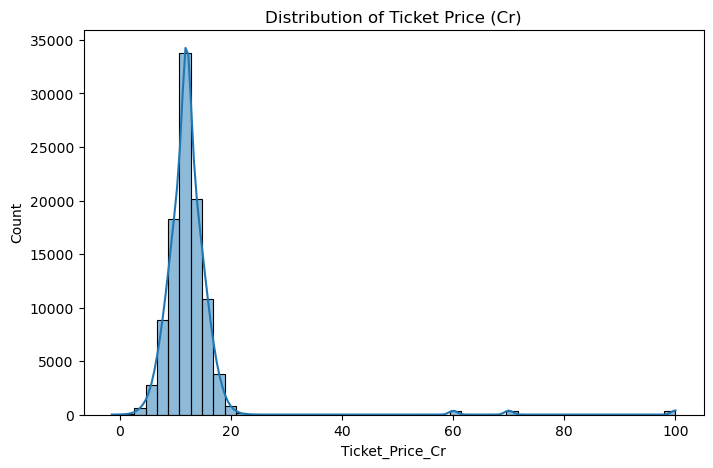

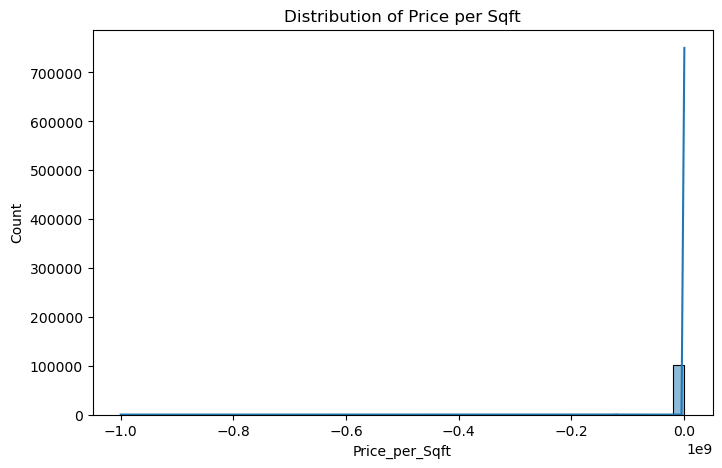

In [16]:
# 1. DISTRIBUTION ANALYSIS

plt.figure(figsize=(8,5))
sns.histplot(df['Ticket_Price_Cr'], bins=50, kde=True)
plt.title("Distribution of Ticket Price (Cr)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Price_per_Sqft'], bins=50, kde=True)
plt.title("Distribution of Price per Sqft")
plt.show()

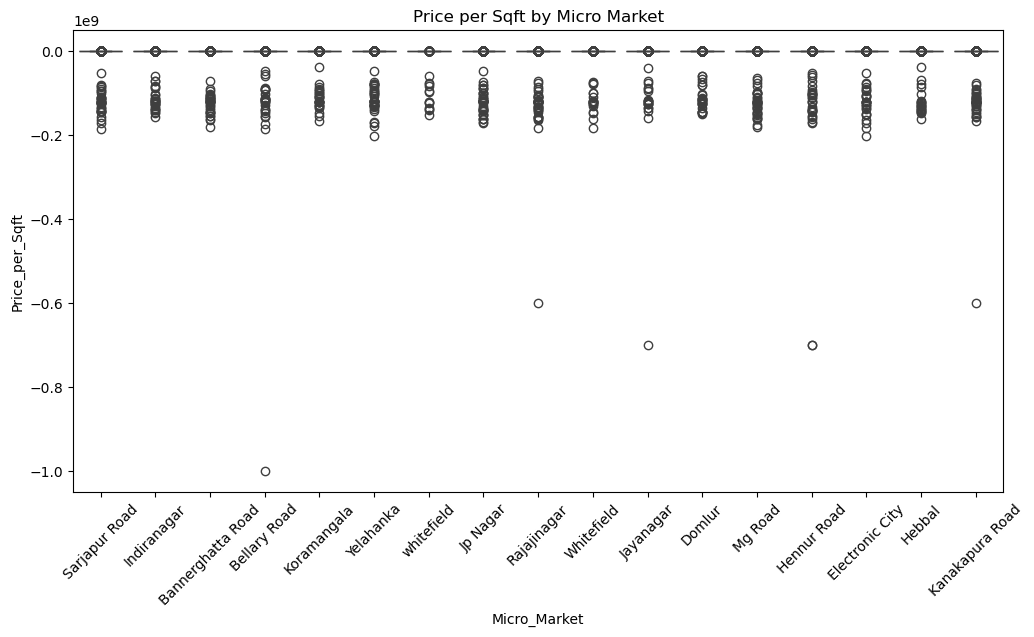

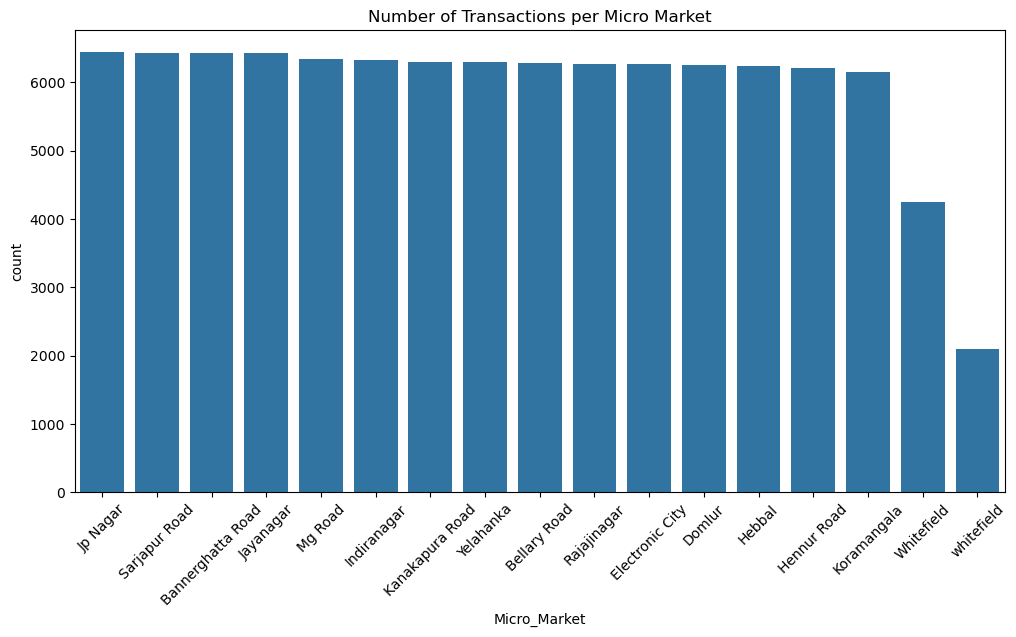

In [17]:
# 2. MARKET ANALYSIS

plt.figure(figsize=(12,6))
sns.boxplot(x='Micro_Market', y='Price_per_Sqft', data=df)
plt.xticks(rotation=45)
plt.title("Price per Sqft by Micro Market")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='Micro_Market', data=df, order=df['Micro_Market'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Transactions per Micro Market")
plt.show()

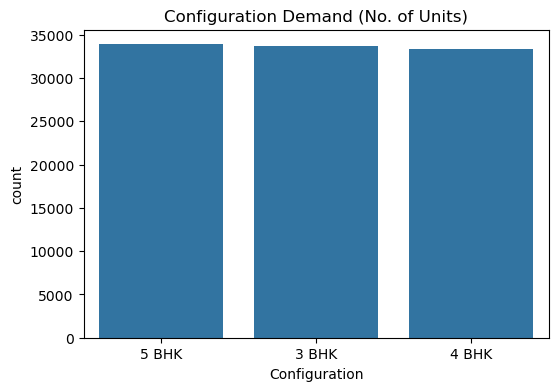

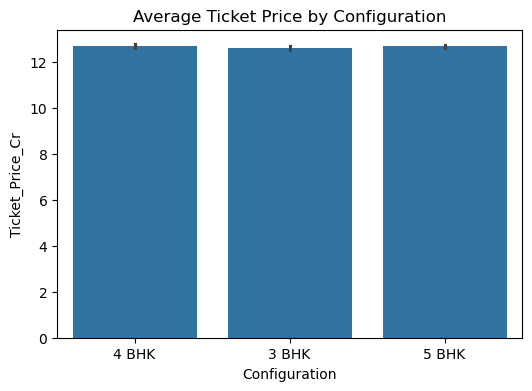

In [18]:
# 3. CONFIGURATION DEMAND

plt.figure(figsize=(6,4))
sns.countplot(x='Configuration', data=df, order=df['Configuration'].value_counts().index)
plt.title("Configuration Demand (No. of Units)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Configuration', y='Ticket_Price_Cr', data=df, estimator='mean')
plt.title("Average Ticket Price by Configuration")
plt.show()

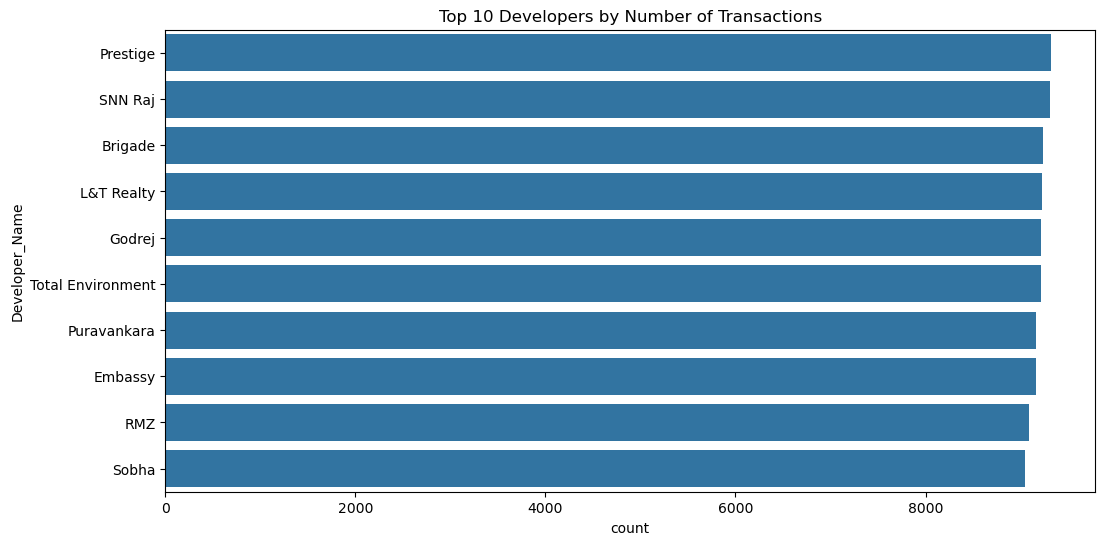

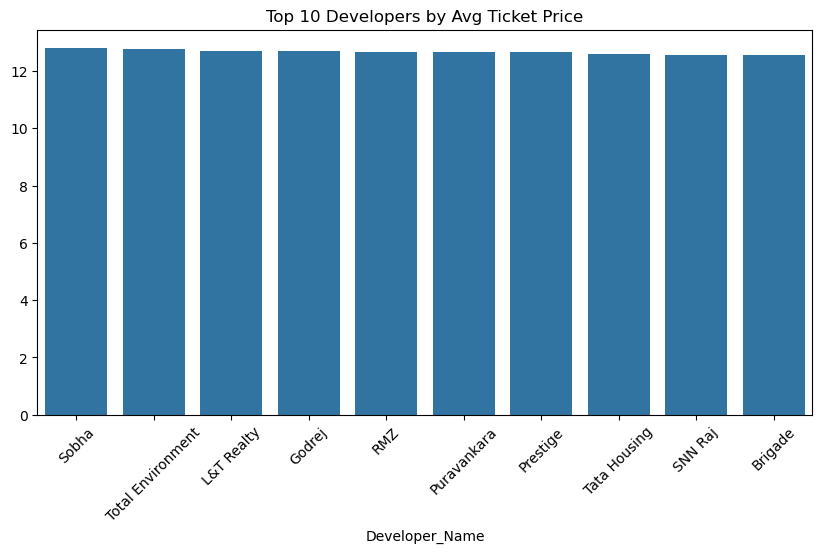

In [19]:
# 4. DEVELOPER PERFORMANCE

top_developers = df['Developer_Name'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(y='Developer_Name', data=df[df['Developer_Name'].isin(top_developers)], order=top_developers)
plt.title("Top 10 Developers by Number of Transactions")
plt.show()

dev_avg_price = df.groupby('Developer_Name')['Ticket_Price_Cr'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=dev_avg_price.index, y=dev_avg_price.values)
plt.xticks(rotation=45)
plt.title("Top 10 Developers by Avg Ticket Price")
plt.show()

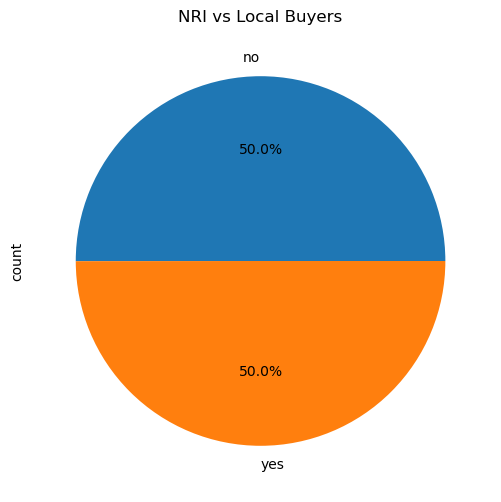

In [20]:
# 5. BUYER BEHAVIOR

plt.figure(figsize=(6,6))
df['NRI_Buyer'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("NRI vs Local Buyers")
plt.show()


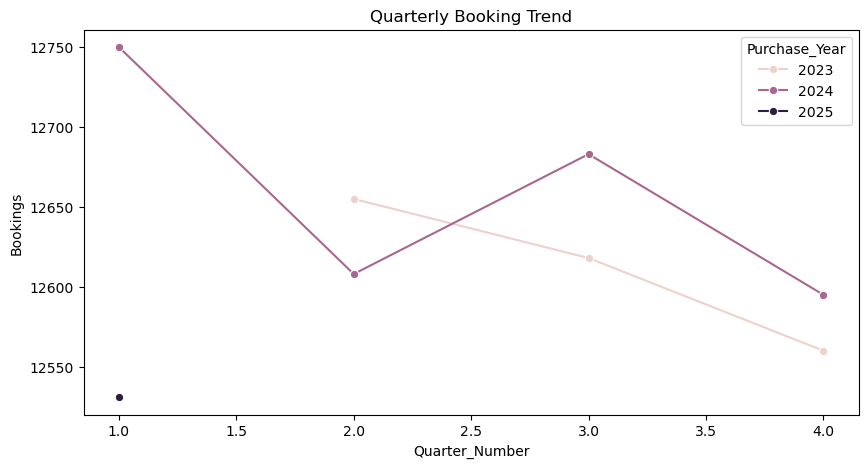

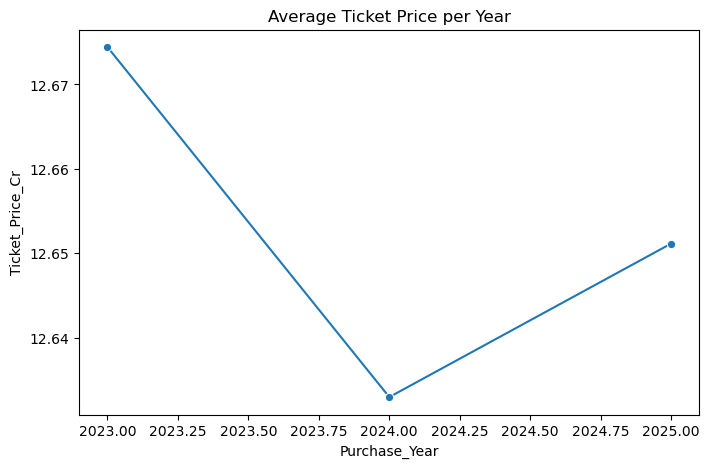

In [21]:
# Convert Purchase_Quarter to datetime 
df['Purchase_Quarter'] = pd.to_datetime(df['Purchase_Quarter'], errors='coerce')

# Extract year and quarter
df['Purchase_Year'] = df['Purchase_Quarter'].dt.year
df['Quarter_Number'] = df['Purchase_Quarter'].dt.quarter

# 6.Time Trends

# Quarterly Booking Trend
trend = df.groupby(['Purchase_Year', 'Quarter_Number']).size().reset_index(name='Bookings')
plt.figure(figsize=(10,5))
sns.lineplot(x='Quarter_Number', y='Bookings', hue='Purchase_Year', data=trend, marker='o')
plt.title("Quarterly Booking Trend")
plt.show()

# Average Ticket Price per Year
avg_price_trend = df.groupby('Purchase_Year')['Ticket_Price_Cr'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='Purchase_Year', y='Ticket_Price_Cr', data=avg_price_trend, marker='o')
plt.title("Average Ticket Price per Year")
plt.show()


C:\Users\rpraj\AppData\Local\Temp\ipykernel_23900\2111219020.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amenity_avg_price = df.groupby('Amenity_Category')['Ticket_Price_Cr'].mean().reset_index()


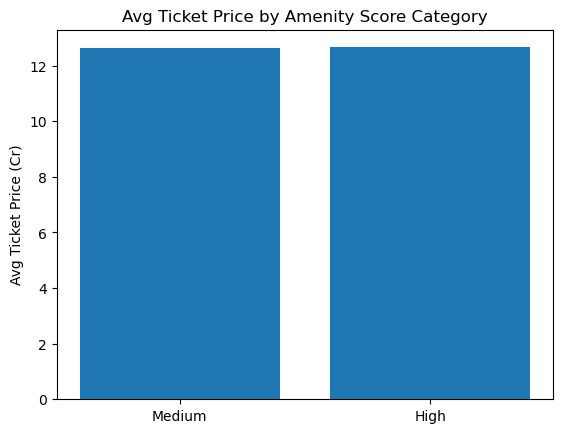

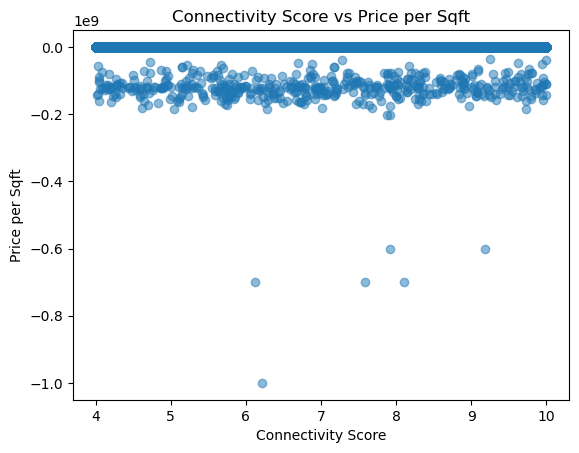

In [22]:
#7.Amenity Score Categories
df['Amenity_Category'] = pd.cut(df['Amenity_Score'], bins=[0,5,7,10], labels=['Low','Medium','High'])

# Average price per category
amenity_avg_price = df.groupby('Amenity_Category')['Ticket_Price_Cr'].mean().reset_index()

# Bar chart: Avg price by Amenity Category
plt.bar(amenity_avg_price['Amenity_Category'], amenity_avg_price['Ticket_Price_Cr'])
plt.title("Avg Ticket Price by Amenity Score Category")
plt.ylabel("Avg Ticket Price (Cr)")
plt.show()

# Scatter plot: Connectivity vs Price per Sqft
plt.scatter(df['Connectivity_Score'], df['Price_per_Sqft'], alpha=0.5)
plt.title("Connectivity Score vs Price per Sqft")
plt.xlabel("Connectivity Score")
plt.ylabel("Price per Sqft")
plt.show()

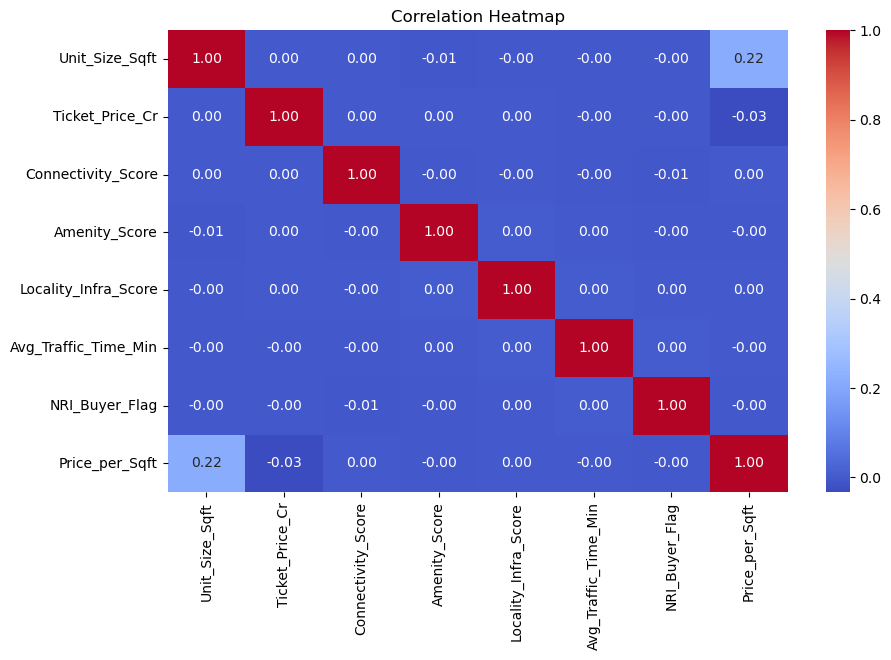

In [23]:
# 8. CORRELATION HEATMAP

plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
